### Imporitng Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="scipy")

In [4]:
df_train = pd.read_csv("F:/train.csv")
df_test  = pd.read_csv("F:/test.csv")

### EDA

In [5]:
print(df_train.shape)
print(df_test.shape)

(75757, 64)
(9705, 63)


In [6]:
df_train.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
27580,3,State_6,Commercial,Warehouse_Nonrefrigerated,235700.0,1925.0,36.0,25.6,11,35.080645,...,75,11,0,0,1.0,1.0,1.0,93.0,126.639726,27580
599,2,State_1,Commercial,Office_Uncategorized,691436.0,1978.0,84.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,66.707303,599
65478,6,State_6,Residential,Multifamily_Uncategorized,58542.0,2005.0,32.0,24.4,11,34.451613,...,96,17,0,0,NaN,NaN,NaN,NaN,64.822404,65478
25521,3,State_6,Residential,Multifamily_Uncategorized,71500.0,1938.0,NaN,11.9,11,35.080645,...,75,11,0,0,NaN,NaN,NaN,NaN,82.604658,25521
19356,2,State_6,Residential,Multifamily_Uncategorized,64490.0,1961.0,NaN,42.7,13,37.322581,...,72,17,0,0,1.0,1.0,1.0,99.0,75.893437,19356


In [7]:
df_test.sample(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
873,7,State_4,Commercial,Education_Other_classroom,543787.0,1961.0,18.0,186.5,-1,27.548387,...,5,79,12,0,0,340.0,320.0,19.2,NaN,76630
5011,7,State_2,Commercial,Religious_worship,76790.0,1990.0,38.0,15.2,15,41.177419,...,0,122,41,0,0,NaN,NaN,NaN,NaN,80768
3112,7,State_4,Residential,Multifamily_Uncategorized,59310.0,1950.0,59.0,186.5,-1,27.548387,...,5,79,12,0,0,340.0,320.0,19.2,NaN,78869
8688,7,State_8,Residential,Multifamily_Uncategorized,141871.0,1957.0,2.0,130.8,2,33.435484,...,0,77,5,0,0,NaN,NaN,NaN,NaN,84445
9619,7,State_11,Residential,5plus_Unit_Building,224105.0,2008.0,NaN,812.0,21,38.661290,...,0,39,3,0,0,NaN,NaN,NaN,NaN,85376


In [8]:
df_train.describe(include='object')

,State_Factor,building_class,facility_type
count,75757,75757,75757
unique,7,2,60
top,State_6,Residential,Multifamily_Uncategorized
freq,50840,43558,39455


In [9]:
df_test.describe(include='object')

,State_Factor,building_class,facility_type
count,9705,9705,9705
unique,6,2,60
top,State_11,Commercial,Multifamily_Uncategorized
freq,3268,5607,2199


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 63 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                9705 non-null   int64  
 1   State_Factor               9705 non-null   object 
 2   building_class             9705 non-null   object 
 3   facility_type              9705 non-null   object 
 4   floor_area                 9705 non-null   float64
 5   year_built                 9613 non-null   float64
 6   energy_star_rating         7451 non-null   float64
 7   ELEVATION                  9705 non-null   float64
 8   january_min_temp           9705 non-null   int64  
 9   january_avg_temp           9705 non-null   float64
 10  january_max_temp           9705 non-null   int64  
 11  february_min_temp          9705 non-null   int64  
 12  february_avg_temp          9705 non-null   float64
 13  february_max_temp          9705 non-null   int64

In [14]:
df_train.describe()


,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


<AxesSubplot:xlabel='State_Factor', ylabel='count'>

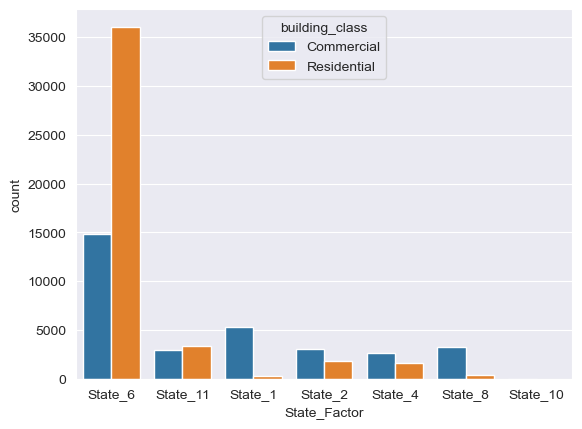

In [16]:
sns.countplot(x='State_Factor',hue='building_class',data=df_train,order = df_train['State_Factor'].value_counts().index)

### Percentage of Data belong to Train and Test Data

<AxesSubplot:ylabel='State_Factor'>

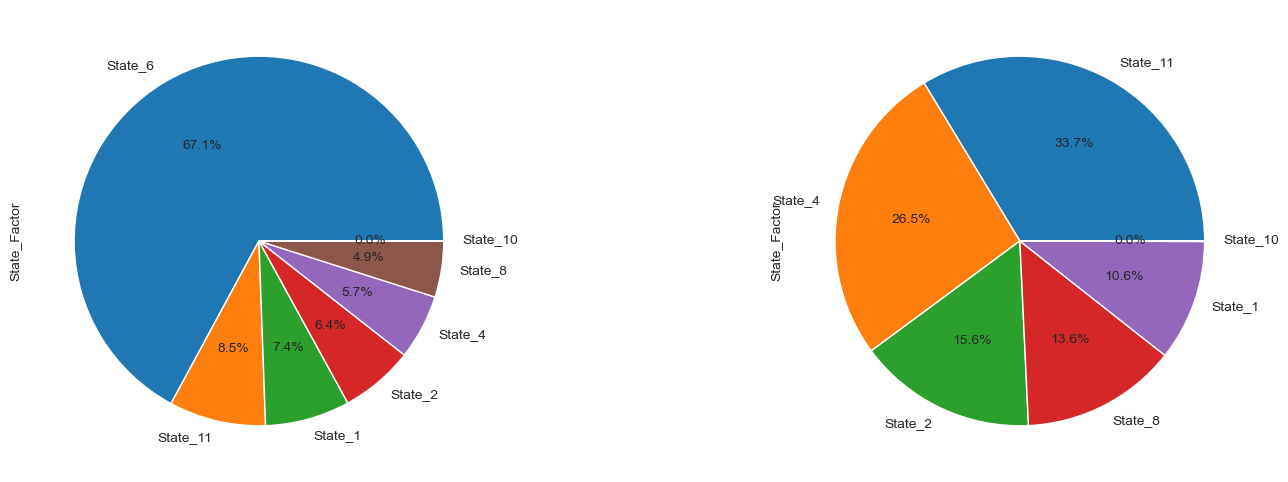

In [18]:
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1) 
df_train['State_Factor'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.subplot(1, 2, 2) 
df_test['State_Factor'].value_counts().plot(kind='pie',autopct='%1.1f%%')

### Corelation

<AxesSubplot:>

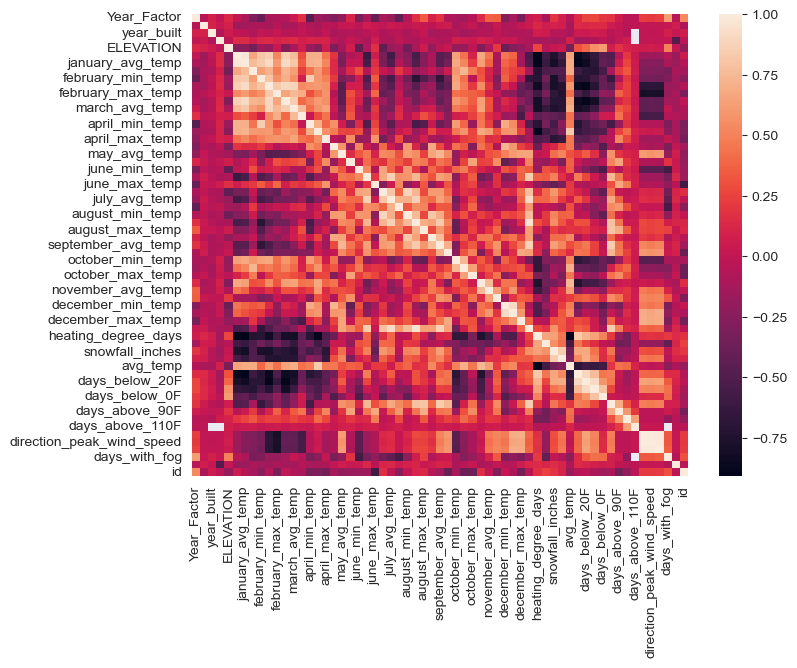

In [20]:
x = df_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(x)

### Building Distribution w.r.t eacy year data

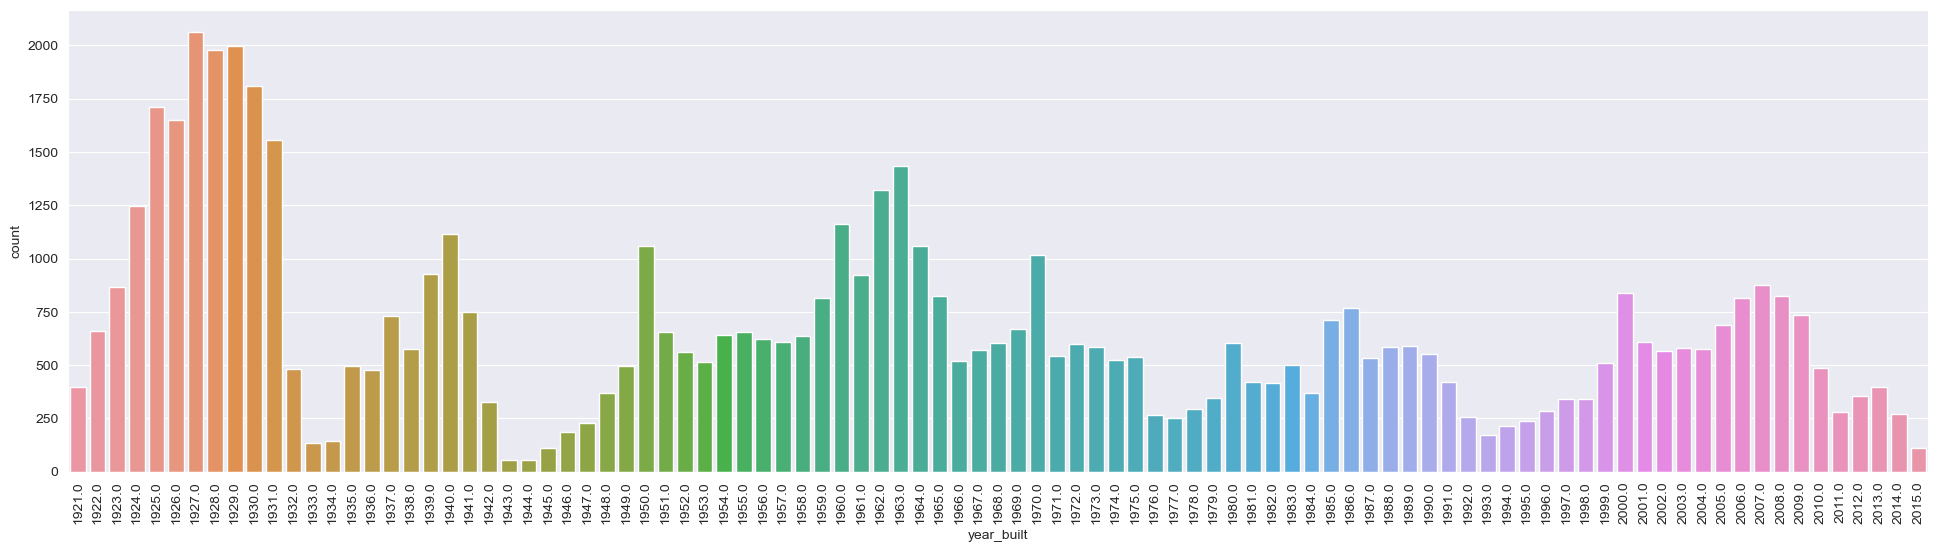

In [21]:
plt.figure(figsize=(24,6))
sns.countplot(x='year_built',data=df_train[(df_train.year_built>1920)])
plt.xticks(rotation=90)
plt.show()

### Distribution of top 10 facilities in buildings

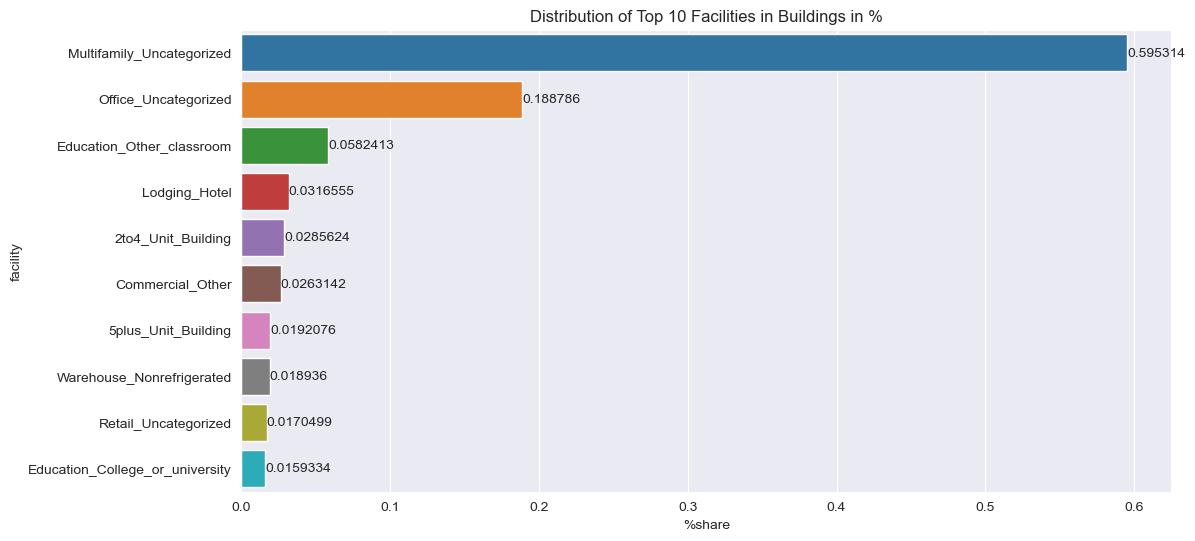

In [22]:
df = pd.DataFrame(df_train['facility_type'].value_counts().head(10))
df['facility'] = df.index
df.rename(columns = {'facility_type':'count'}, inplace = True)
df['%share'] = df['count']/df['count'].sum()
df.drop(columns=['count'],inplace=True)
df.reset_index(drop=True)
plt.figure(figsize=(12,6))
ax = sns.barplot(y='facility',x='%share',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Distribution of Top 10 Facilities in Buildings in %")
plt.show()

### Commercial Building Charact....

In [24]:
df = pd.DataFrame(df_train[df_train['building_class']=='Commercial'][['site_eui','floor_area','year_built','ELEVATION','State_Factor','facility_type']].sort_values(by=['site_eui']).tail(200))
df.dropna()

,site_eui,floor_area,year_built,ELEVATION,State_Factor,facility_type
8615,457.494313,33752.0,1996.0,44.2,State_2,Grocery_store_or_food_market
21901,459.017907,84000.0,1920.0,42.7,State_6,Education_Other_classroom
67877,461.280202,114000.0,1960.0,126.5,State_8,Industrial
28778,462.691411,62157.0,1973.0,15.2,State_6,Education_College_or_university
24899,463.700000,220240.0,1950.0,11.9,State_6,Health_Care_Inpatient
...,...,...,...,...,...,...
9745,962.241793,56433.0,1926.0,3.0,State_2,Office_Uncategorized
6781,970.388586,56433.0,1926.0,213.4,State_2,Office_Uncategorized
28107,975.452321,10000.0,1914.0,15.2,State_6,Parking_Garage
55578,989.887978,63000.0,1930.0,3.4,State_6,Education_College_or_university


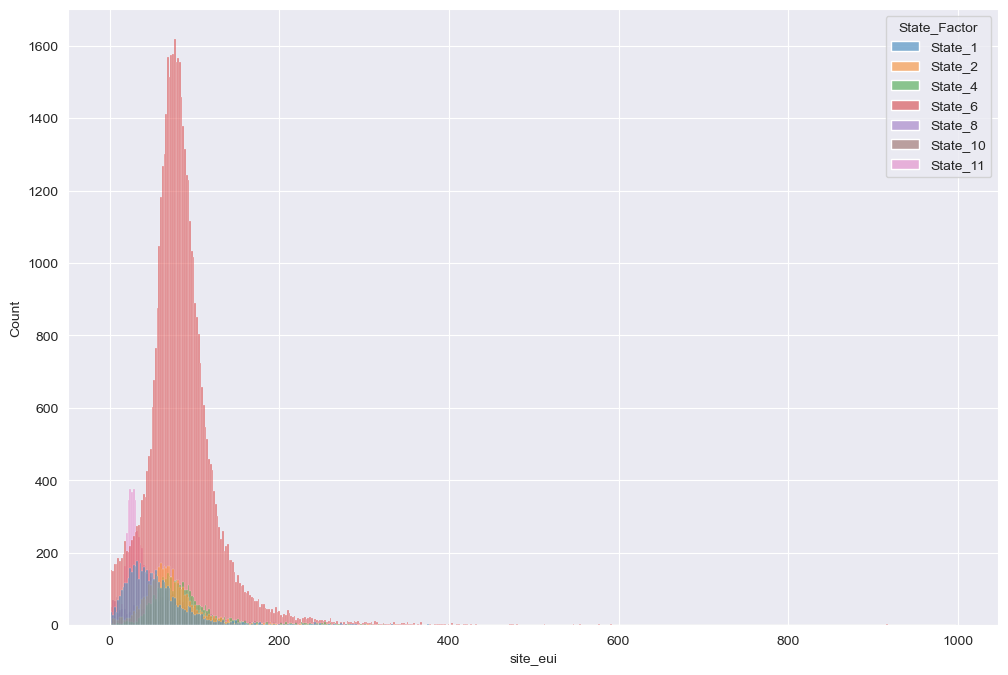

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(data = df_train, x = "site_eui",hue='State_Factor')
plt.show()

In [28]:
len(df_train[df_train['building_class']=='Residential'])

43558

### Building wise top 10 Distribution

In [30]:
df_train[df_train['building_class']=='Residential'][['facility_type']].value_counts()

facility_type                       
Multifamily_Uncategorized               39455
2to4_Unit_Building                       1893
5plus_Unit_Building                      1273
Mixed_Use_Commercial_and_Residential      672
Mixed_Use_Predominantly_Commercial        256
Mixed_Use_Predominantly_Residential         9
dtype: int64

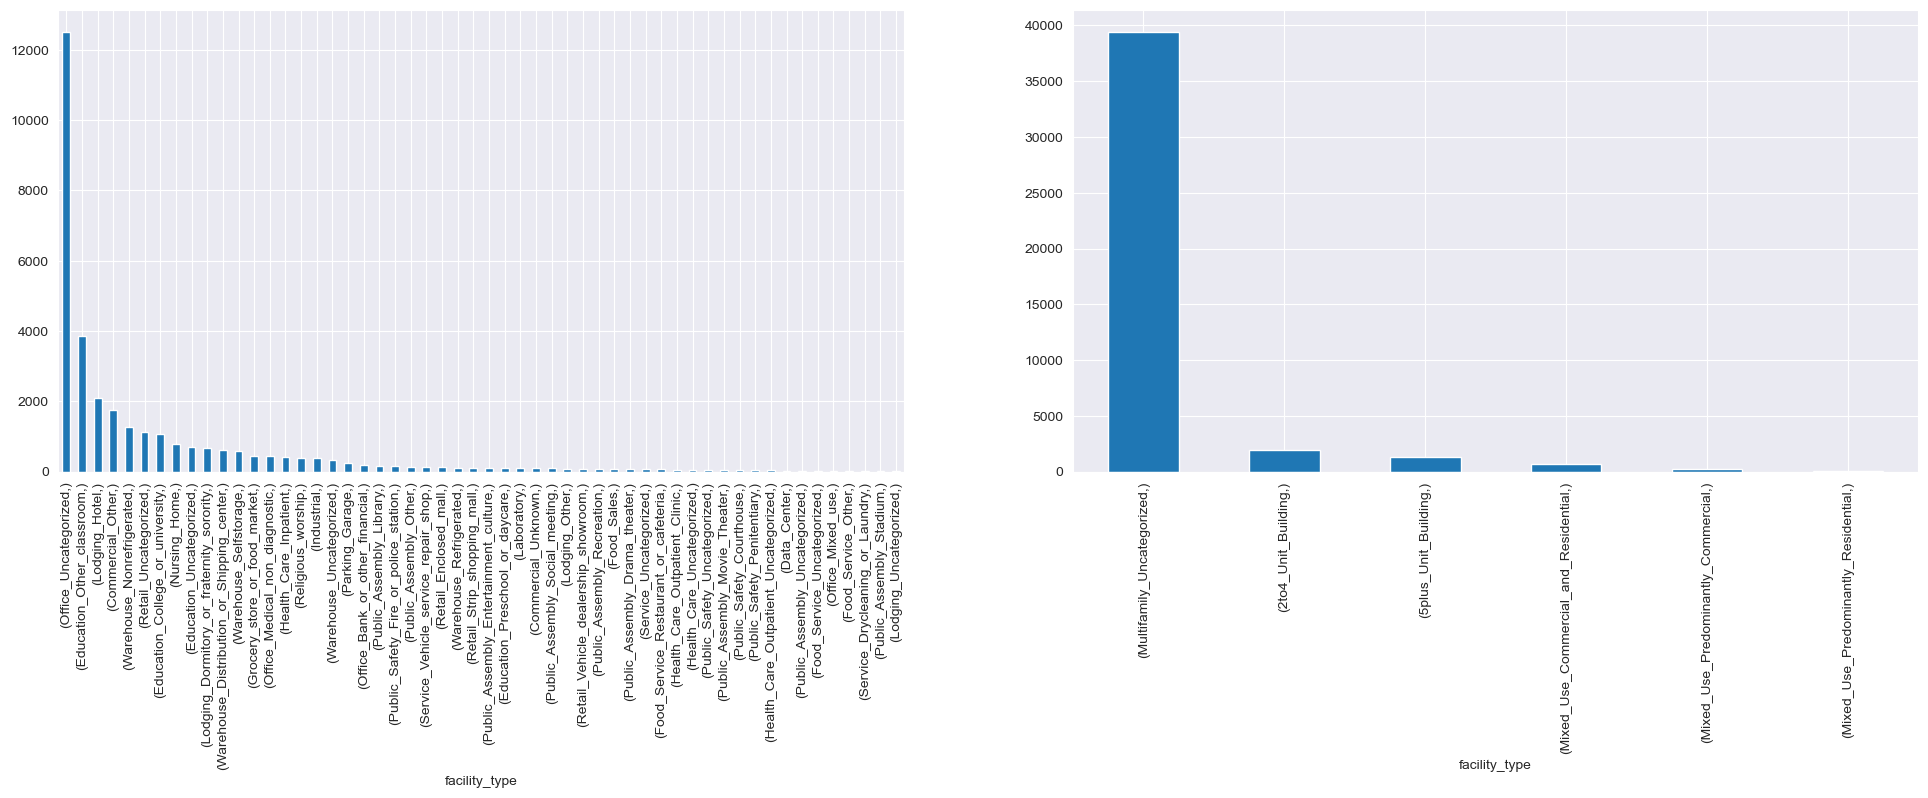

In [31]:
plt.figure(figsize=(24,6))

plt.subplot(1, 2, 1)
df_train[df_train['building_class']=='Commercial'][['facility_type']].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
df_train[df_train['building_class']=='Residential'][['facility_type']].value_counts().plot(kind='bar')

plt.show()

### Corelation between Floor Area and Building Class

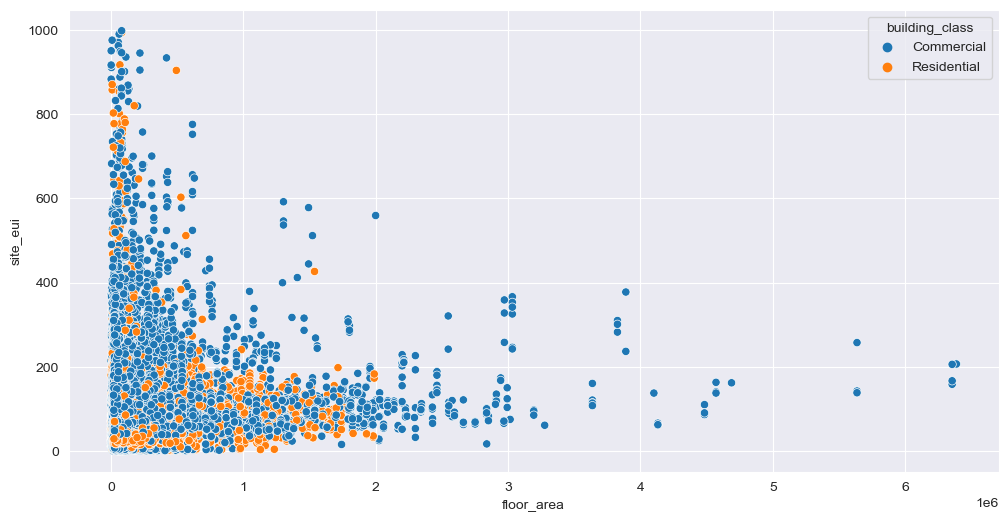

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_train,x='floor_area',hue='building_class',y='site_eui')
plt.show()

### Distribution of Floor_area wrt energy_star_rating on the basis of States

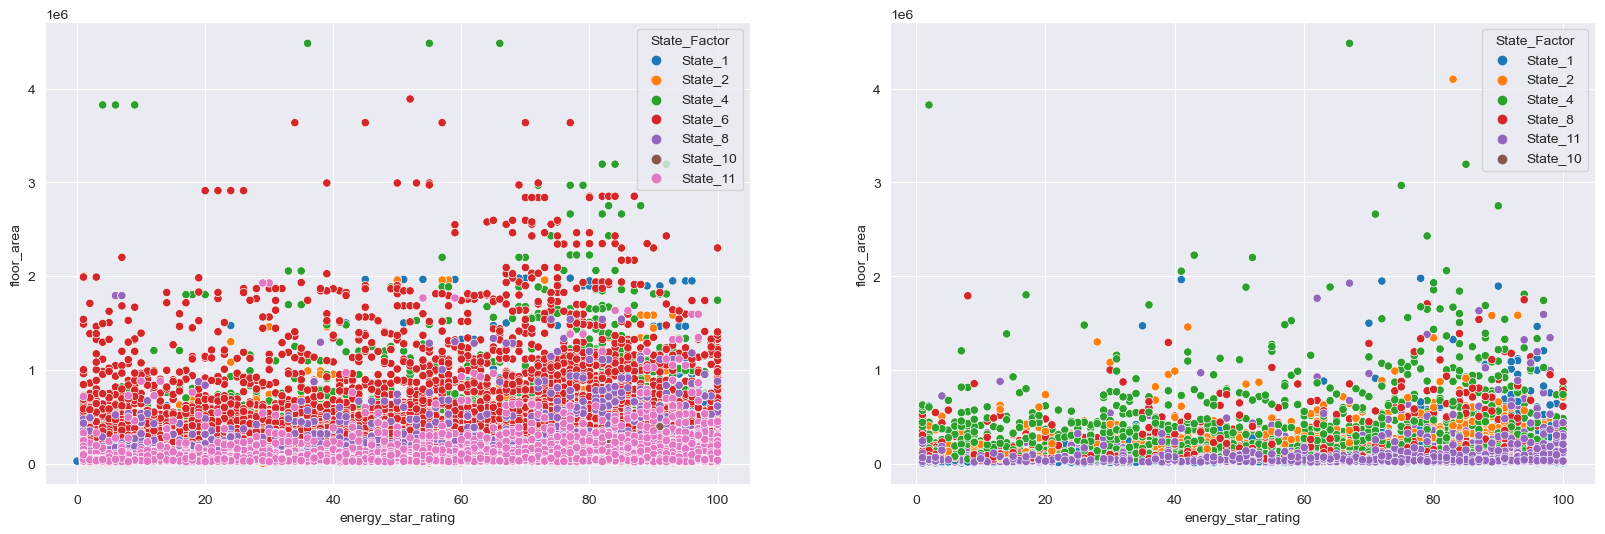

In [35]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df_train,y='floor_area',hue='State_Factor',x='energy_star_rating')

plt.subplot(1,2,2)
sns.scatterplot(data=df_test,y='floor_area',hue='State_Factor',x='energy_star_rating')
plt.show()

### Distribution of site_eui wrt ELEVATION

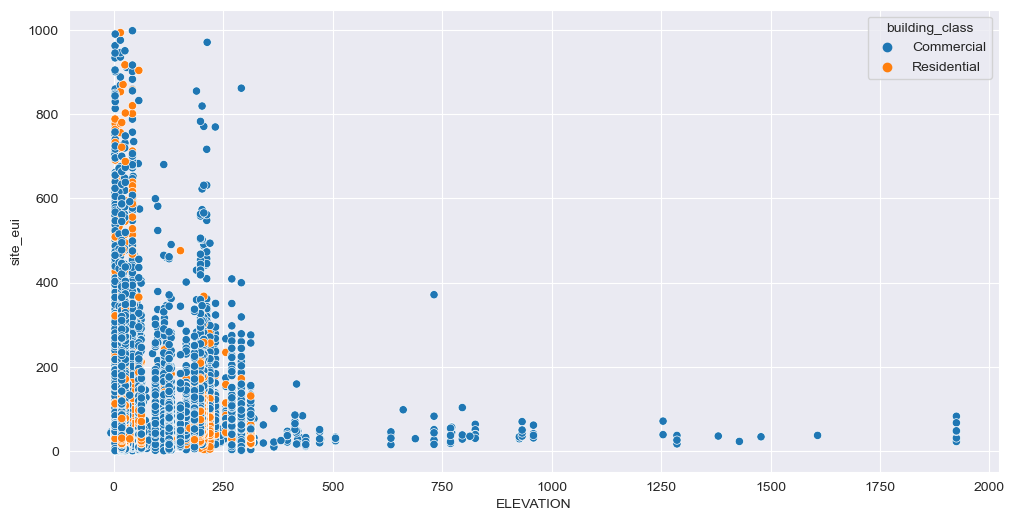

In [38]:
plt.figure(figsize=(12,6))

sns.scatterplot(data=df_train, x="ELEVATION", y="site_eui",hue='building_class')
plt.show()

In [39]:
# Check for missing values
df_train.isna().sum()

Year_Factor                      0
State_Factor                     0
building_class                   0
facility_type                    0
floor_area                       0
                             ...  
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
id                               0
Length: 64, dtype: int64

In [40]:
# Check for missing values
df_test.isna().sum()

Year_Factor                     0
State_Factor                    0
building_class                  0
facility_type                   0
floor_area                      0
                             ... 
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
id                              0
Length: 63, dtype: int64

Text(0.5, 1.0, 'Missing values in test data')

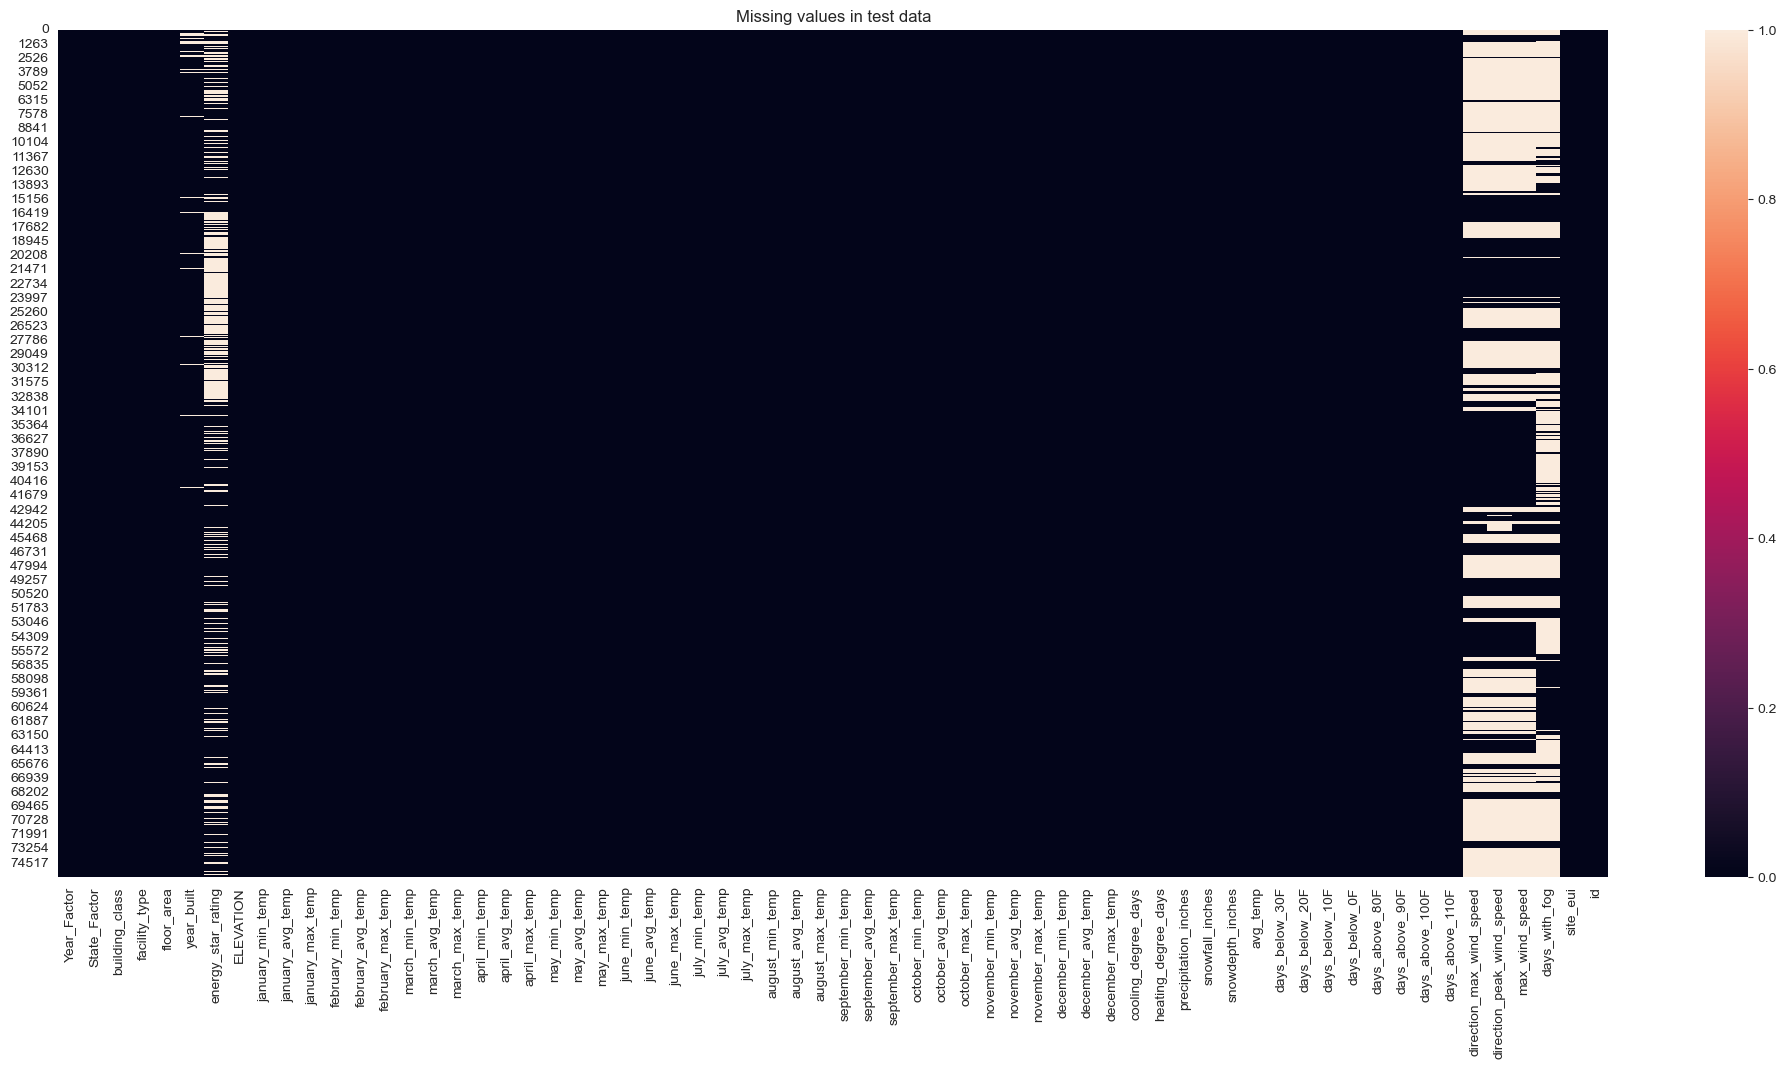

In [41]:
plt.figure(figsize=(25,11))
sns.heatmap(df_train.isna(),xticklabels = df_train.columns)
plt.title("Missing values in test data")

Text(0.5, 1.0, 'Missing values in test data')

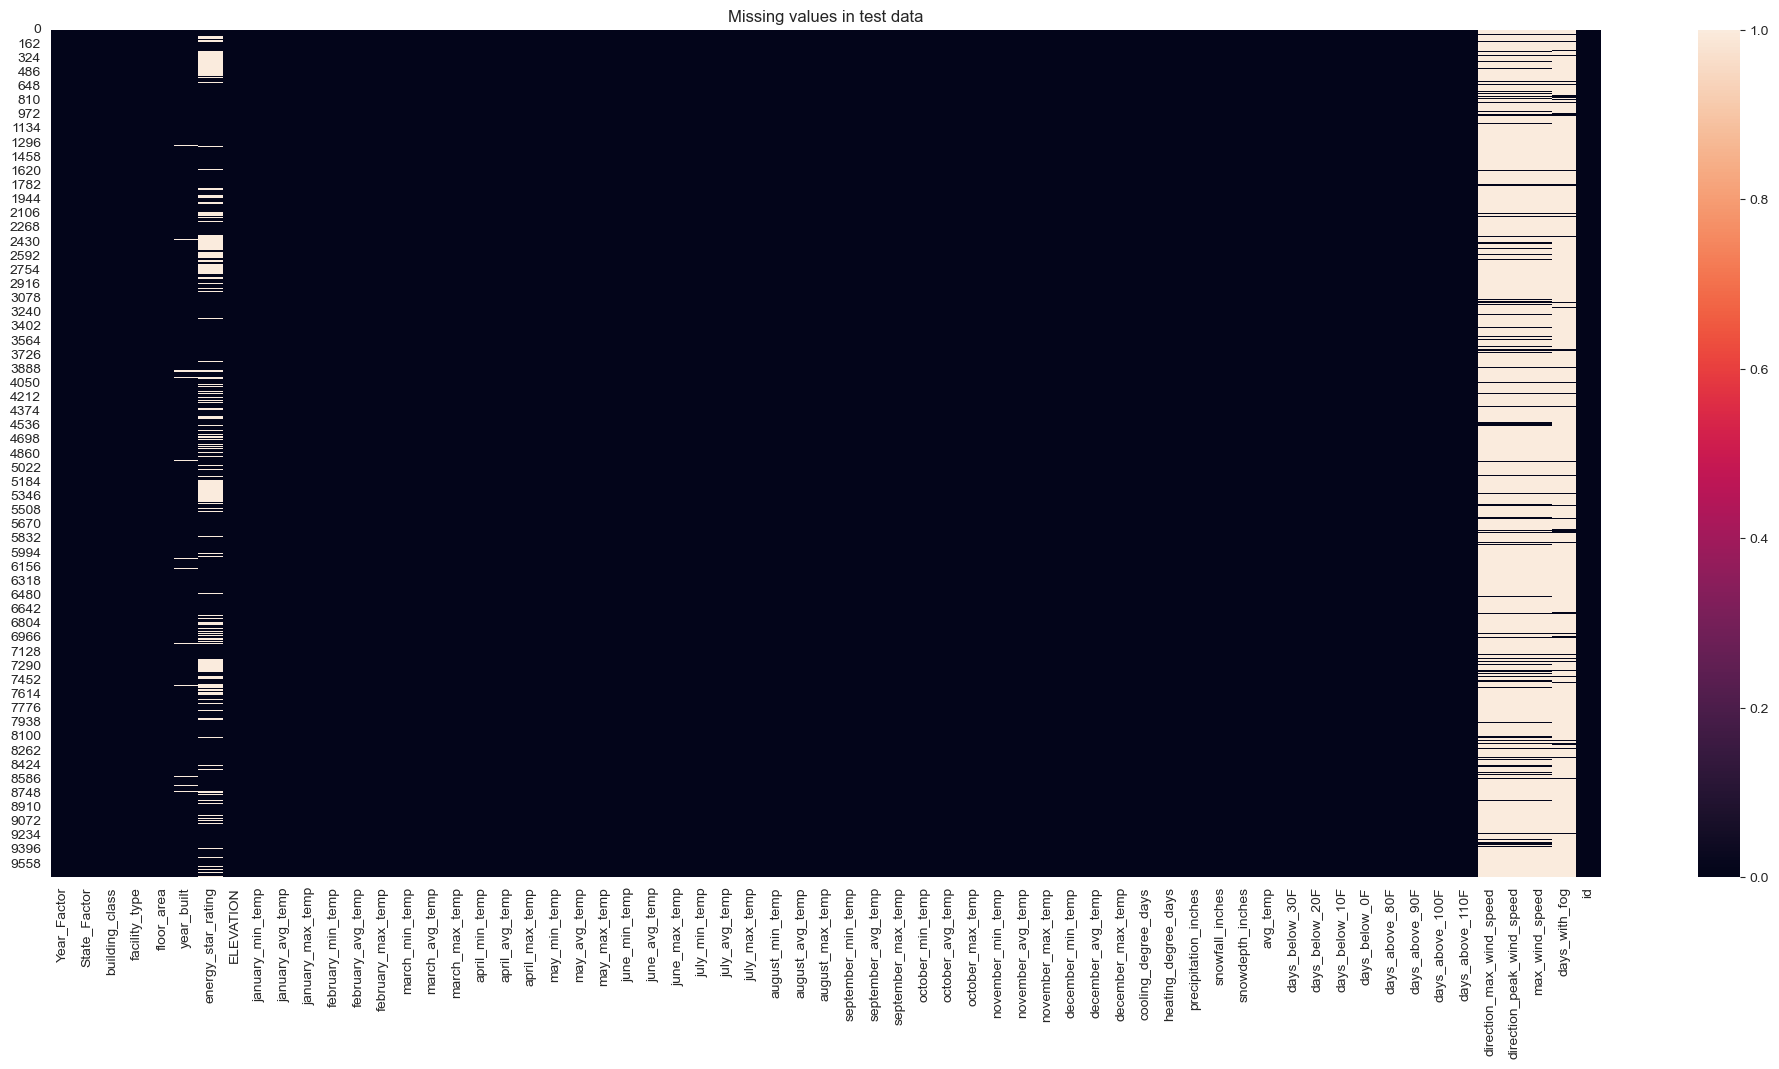

In [42]:
plt.figure(figsize=(25,11))
sns.heatmap(df_test.isna(),xticklabels = df_test.columns)
plt.title("Missing values in test data")

### Preprocessing

In [43]:
df_train.drop(["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"], axis=1, inplace=True)
df_test.drop(["direction_max_wind_speed","direction_peak_wind_speed","max_wind_speed","days_with_fog"], axis=1, inplace=True)

In [44]:
df_train['year_built'].isna().sum()

1837

In [45]:
df_test['year_built'].isna().sum()

92

In [46]:
df_train = df_train.dropna(subset=['year_built'])
df_test = df_test.dropna(subset=['year_built'])

Text(0.5, 1.0, 'Missing values in test data')

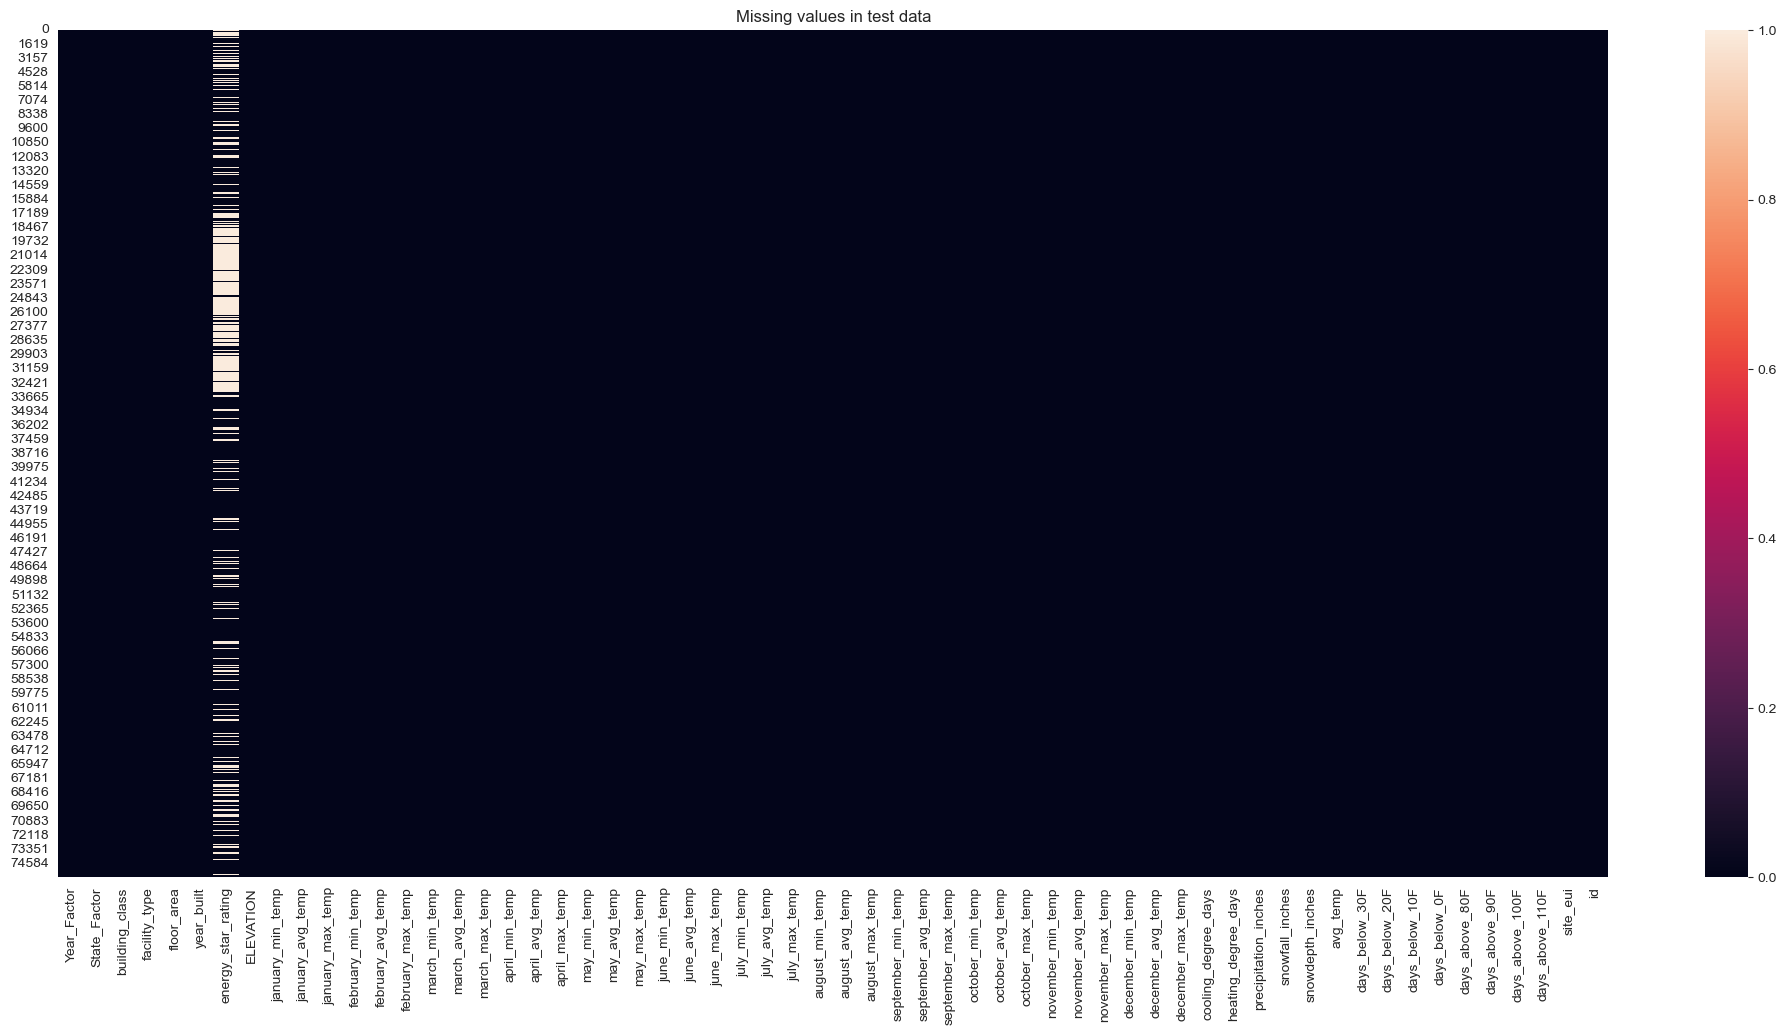

In [47]:
plt.figure(figsize=(25,11))
sns.heatmap(df_train.isna(),xticklabels = df_train.columns)
plt.title("Missing values in test data")

Text(0.5, 1.0, 'Missing values in test data')

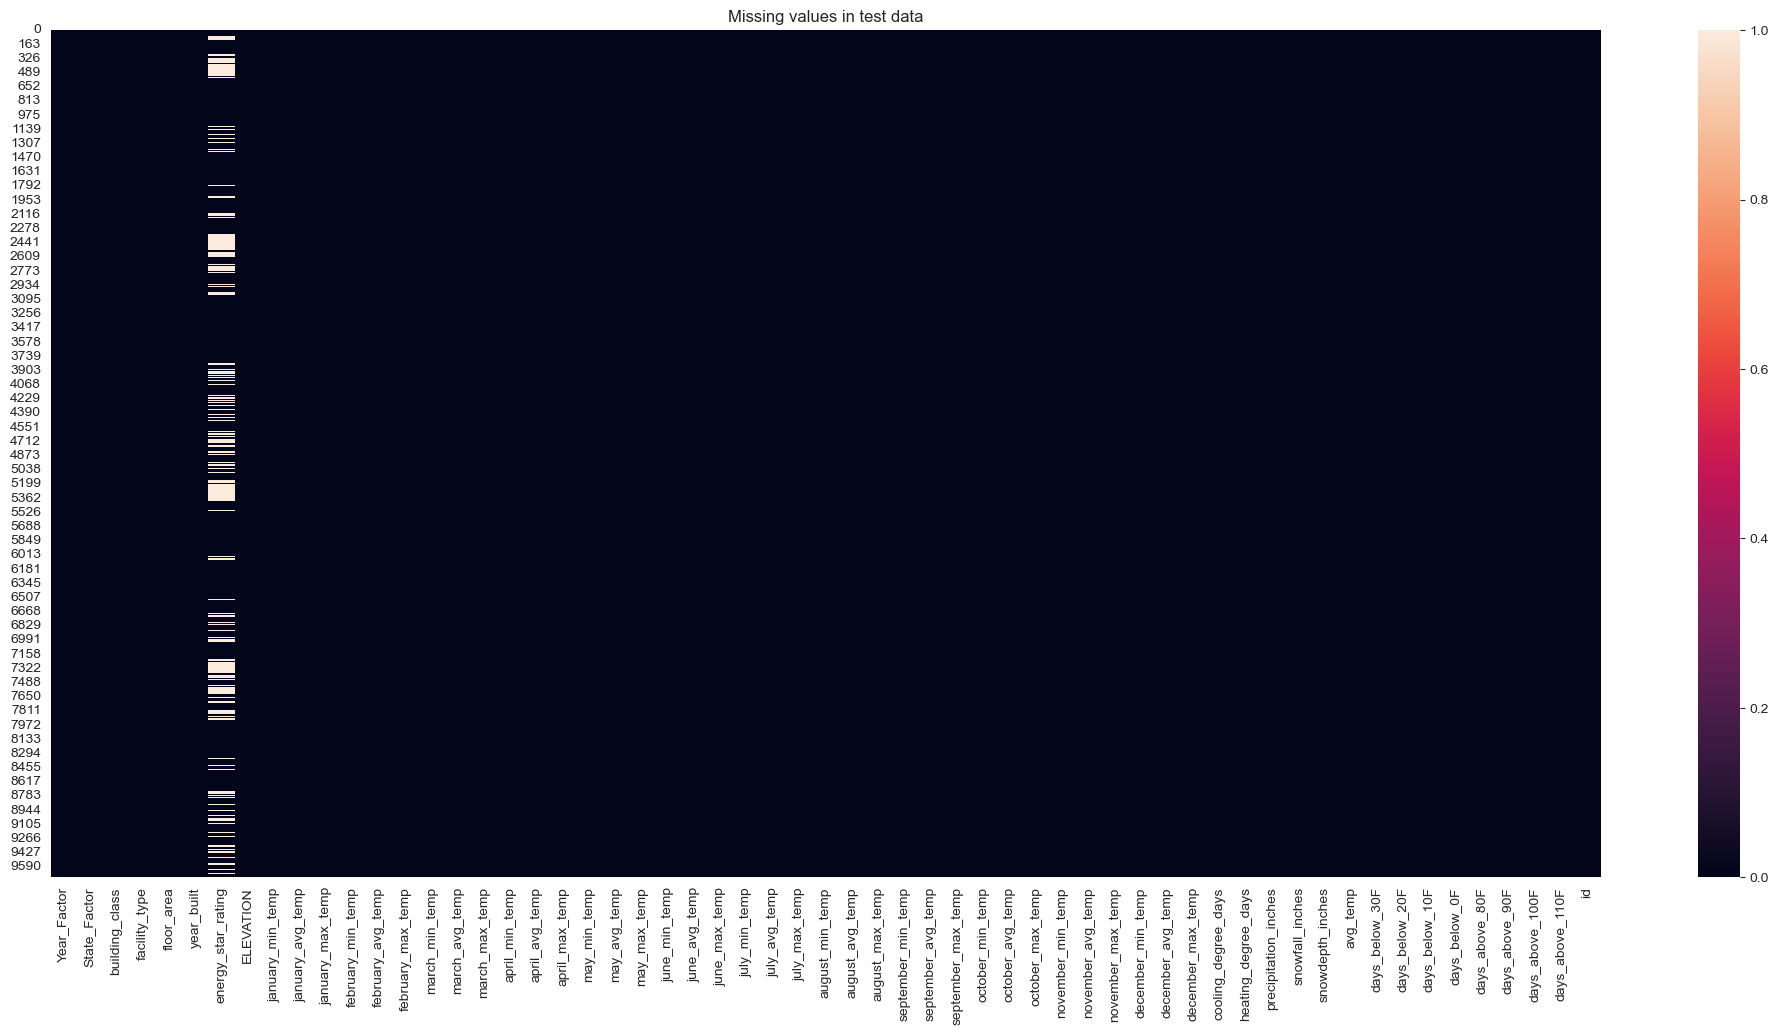

In [48]:
plt.figure(figsize=(25,11))
sns.heatmap(df_test.isna(),xticklabels = df_test.columns)
plt.title("Missing values in test data")

### Impute using KNN

In [49]:
from sklearn.impute import KNNImputer

In [50]:
knnimputer = KNNImputer(n_neighbors=7)

In [51]:
# Perform k-NN imputation on the 'energy_star_rating' column
df_train['energy_star_rating'] = knnimputer.fit_transform(df_train[['energy_star_rating']])
df_test['energy_star_rating'] = knnimputer.fit_transform(df_test[['energy_star_rating']])

In [54]:
print(df_train['energy_star_rating'].isna().sum())
print(df_test['energy_star_rating'].isna().sum())

0
0


Text(0.5, 1.0, 'Missing values in test data')

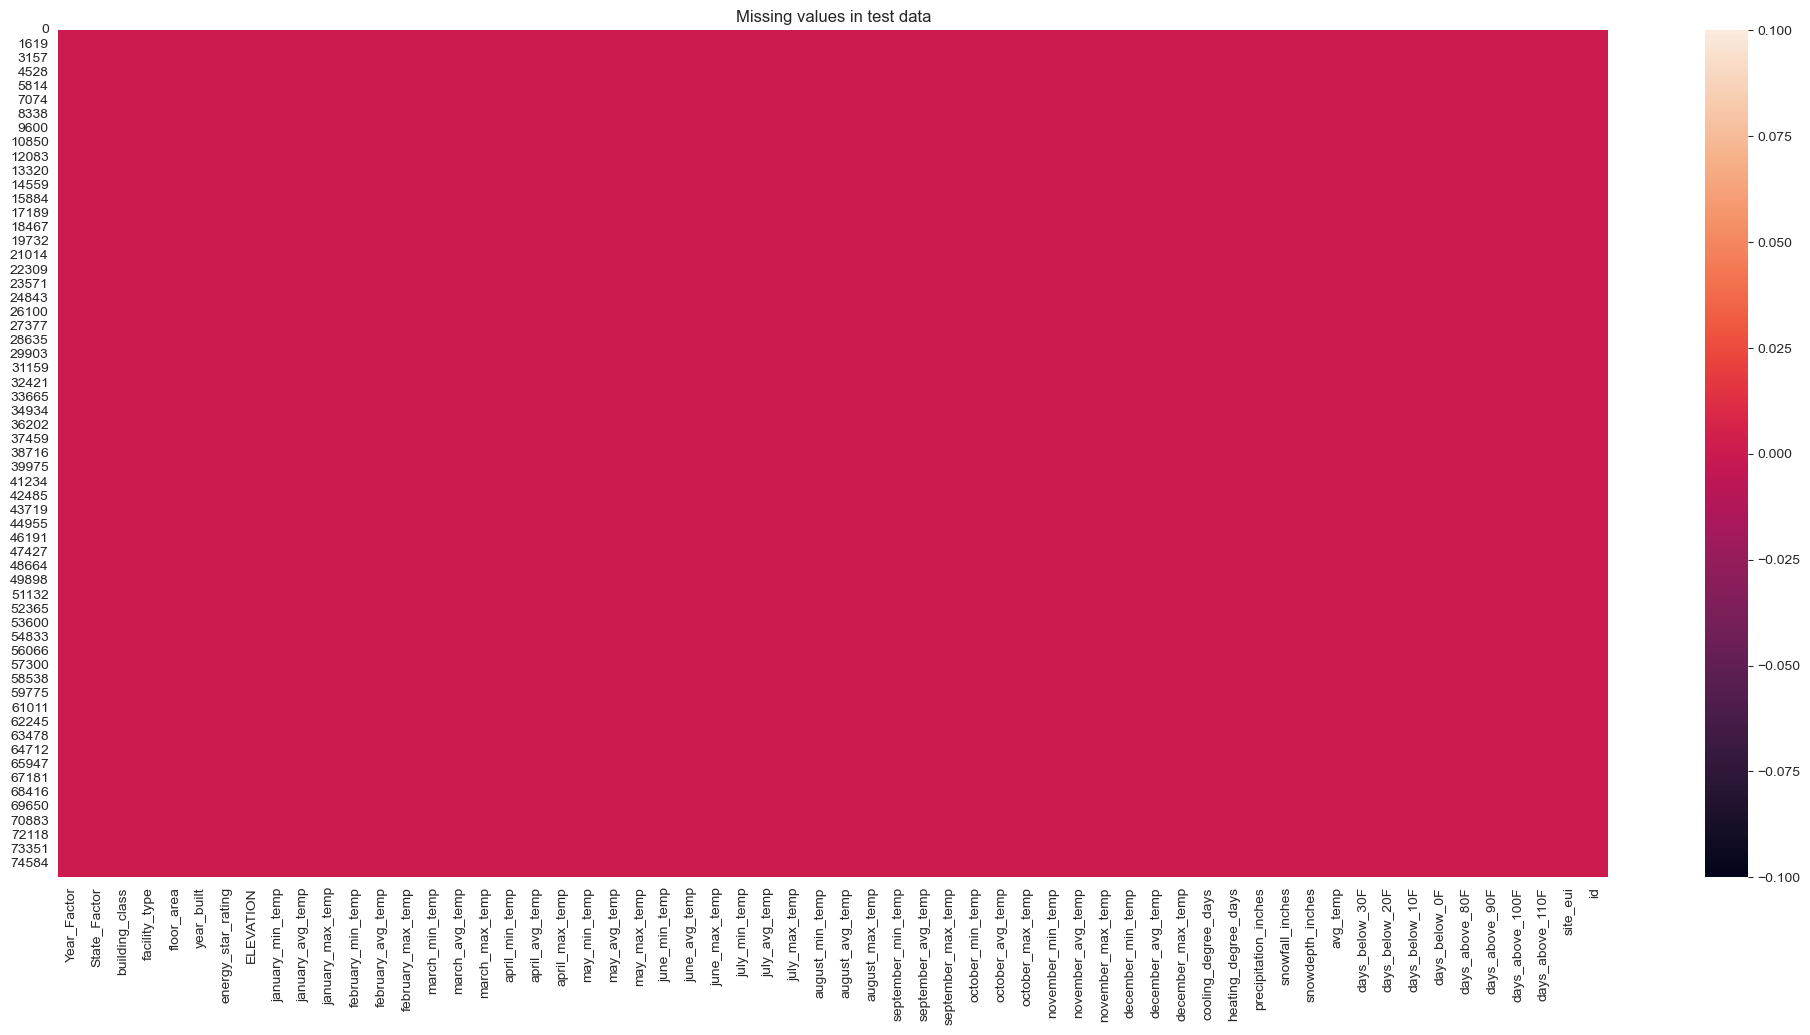

In [55]:
plt.figure(figsize=(25,11))
sns.heatmap(df_train.isna(),xticklabels = df_train.columns)
plt.title("Missing values in test data")

Text(0.5, 1.0, 'Missing values in test data')

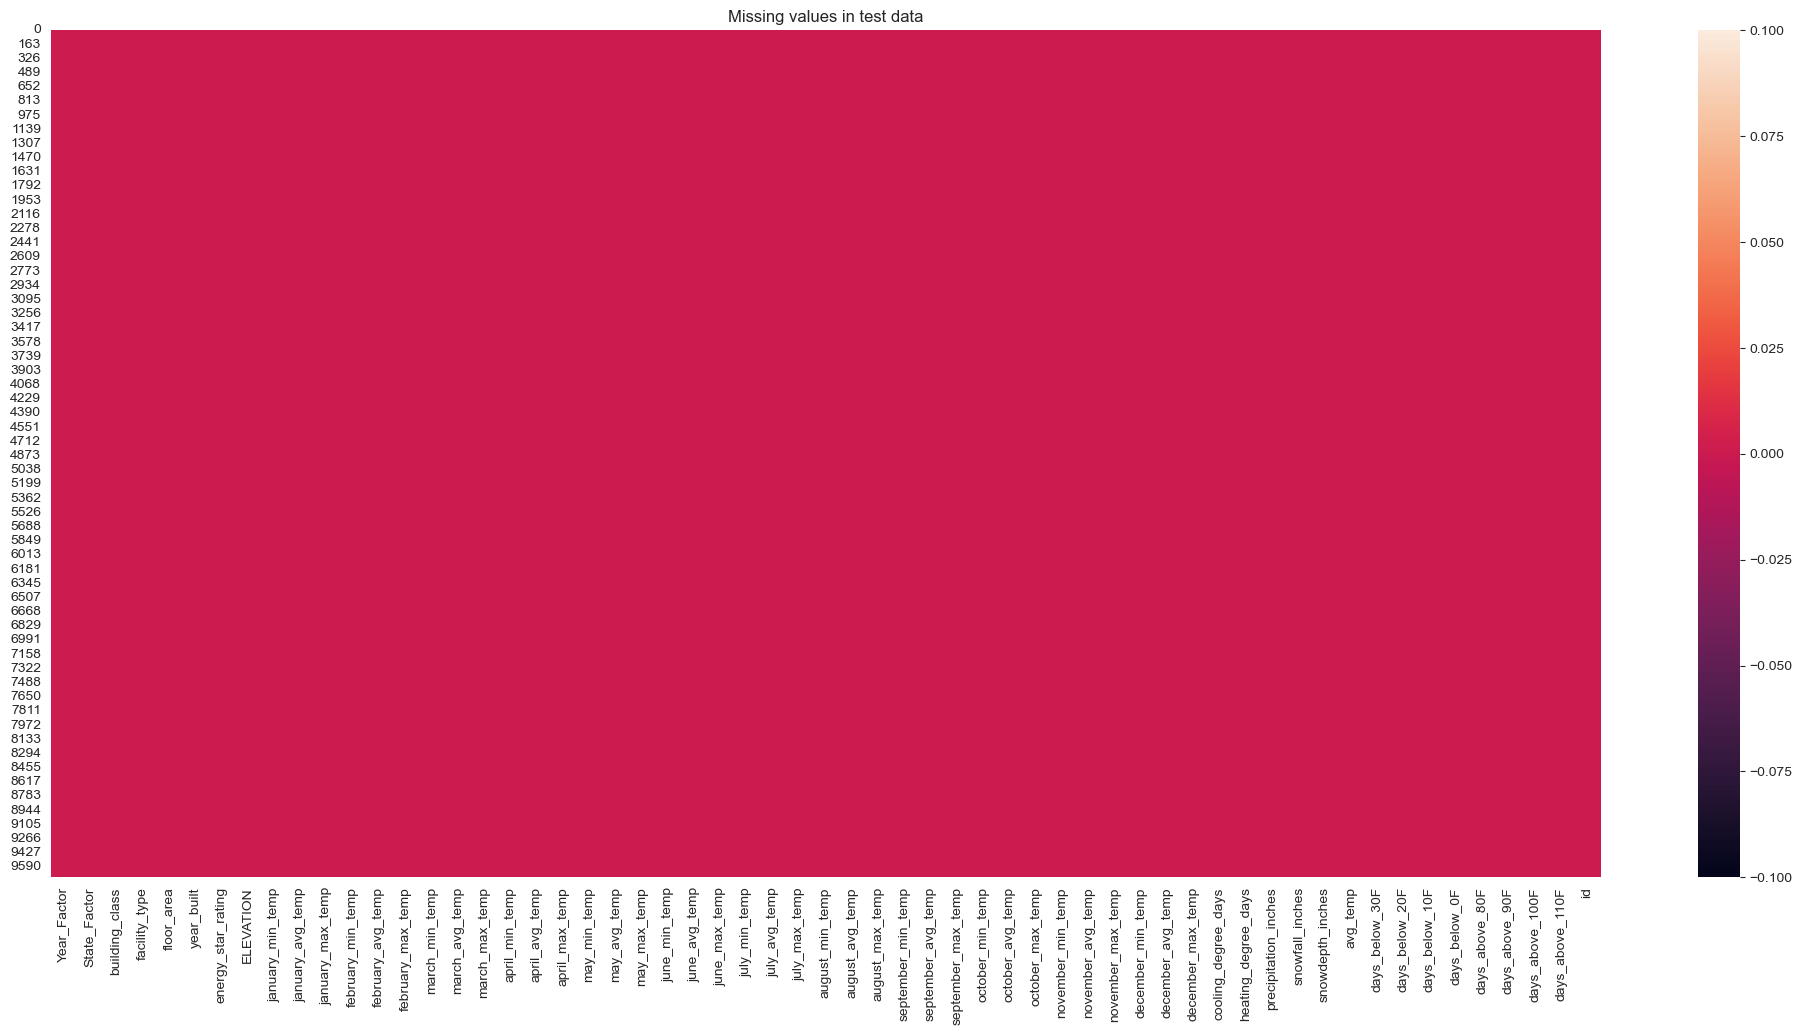

In [56]:
plt.figure(figsize=(25,11))
sns.heatmap(df_test.isna(),xticklabels = df_test.columns)
plt.title("Missing values in test data")

### Encode categorical features using LabelEncoder

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
cat_features = ['State_Factor', 'building_class', 'facility_type']

le = LabelEncoder()

for feature in cat_features:   
    df_train[feature] = le.fit_transform(df_train[feature])
    
for feature in cat_features:
    df_test[feature] = le.fit_transform(df_test[feature])

###  Modeling

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
X_train = df_train.drop(['site_eui','id'], axis=1)
y_train = df_train['site_eui']

In [65]:
X_train.shape, y_train.shape

((73920, 58), (73920,))

In [66]:
X_test = df_test.drop(['id'], axis=1)

In [68]:
models = {'XGB': XGBRegressor(), 
          'RFR': RandomForestRegressor(n_estimators=200), 
          'ETR': ExtraTreesRegressor()}

fitted_models = {}

for model_name, model in models.items():
    model.fit(X_train, y_train.to_numpy().reshape(-1))
    y_pred = model.predict(X_test)
    
    if model_name == 'XGB':
        # Create a DataFrame with the id and site_eui columns
        results = pd.DataFrame({'id': X_test.index, 'site_eui': y_pred})
        
        # Save the DataFrame to a CSV file
        results.to_csv('submission.csv', index=False)
    
    print(f"{model_name} predictions: {y_pred}")

    # Save the fitted model to the fitted_models dictionary
    fitted_models[model_name] = model


XGB predictions: [273.75937  202.14192  216.71054  ... 105.129295  63.760338  51.297672]
RFR predictions: [281.91378477 227.97683184 240.49044897 ...  71.17393307  52.30115864
  51.38847819]
ETR predictions: [257.590829   223.88547484 216.931857   ...  49.22601194  47.72972153
  57.27010774]
